In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
import io
import seaborn as sns
import os
from os import listdir
from os.path import isfile, join
%matplotlib inline

In [2]:
path = "../results/mnist_results/"

In [3]:
index_path = [join(path, "omni_results/"), join(path, "vp_results/"), join(path, "pm_results/"), join(path, "mvp_results")]

query_data = []

for directory in index_path:
    subfolders = [f.path for f in os.scandir(directory) if f.is_dir()]
    for rep in subfolders:
        onlyfiles = [join(rep,f) for f in listdir(rep) if isfile(join(rep, f))]
        for filePath in onlyfiles:
            try:
                file = open(filePath)
                lines = file.readlines()
                data = [line.rstrip().split(",") for line in lines]
                index = data[0][0]
                pivot = data[0][2]
                data = data[2:]

                for i in range(0, len(data)):
                    data[i] = [index, pivot] + data[i]

                query_data.extend(data)
            finally:
                file.close()

columns = ["Index", "Pivot", "K", "Time", "Distance_Count", "Disk_Access"]
query_data.insert(0, columns)
data = [" ".join(line) for line in query_data]
df = pd.read_csv(io.StringIO('\n'.join(data)), delim_whitespace=True)

In [4]:
group_df = df.groupby(["Index", "Pivot", "K"])[["Time", "Distance_Count", "Disk_Access"]].mean().reset_index()
group_df

,Index,Pivot,K,Time,Distance_Count,Disk_Access
0,MVPTREE,CONVEX,5,2.712772e+08,8971.759,255.211
1,MVPTREE,CONVEX,10,2.612483e+08,8979.079,255.423
2,MVPTREE,CONVEX,15,2.610745e+08,8984.055,255.567
3,MVPTREE,CONVEX,20,2.610213e+08,8987.024,255.653
4,MVPTREE,CONVEX,25,2.610419e+08,8989.340,255.720
...,...,...,...,...,...,...
1035,VPTREE,WDR,80,1.285792e+08,9053.316,126.966
1036,VPTREE,WDR,85,1.307000e+08,9057.117,127.020
1037,VPTREE,WDR,90,1.331422e+08,9064.977,127.131
1038,VPTREE,WDR,95,1.356072e+08,9068.691,127.184


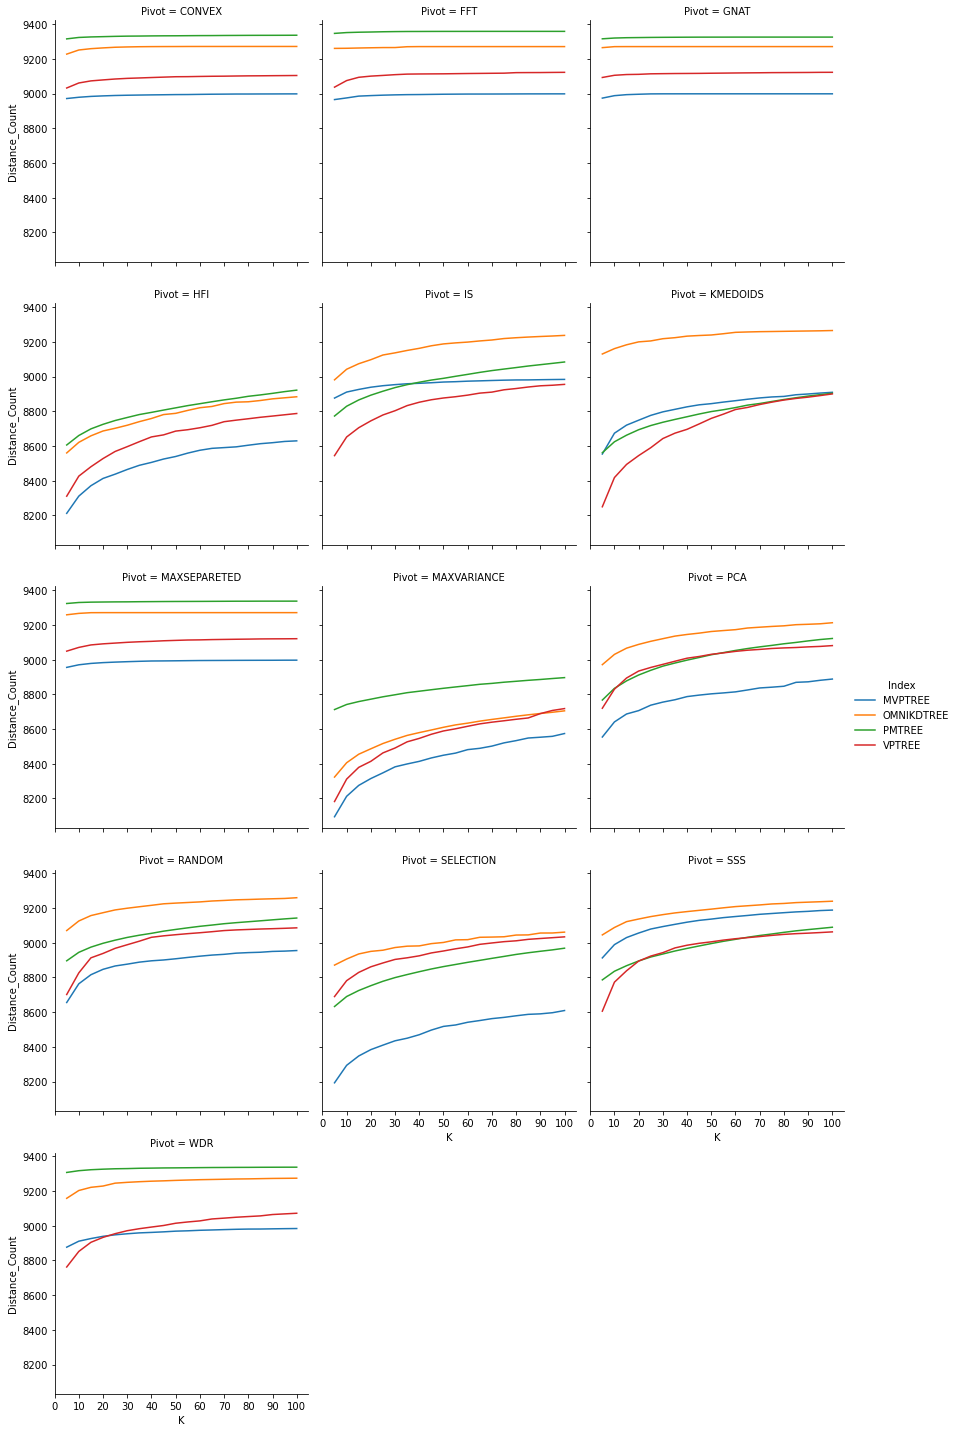

In [5]:
g = sns.FacetGrid(group_df, col="Pivot", hue="Index", col_wrap=3, height=4, aspect=1)
g.map(sns.lineplot, "K", "Distance_Count")
g.set(xticks=np.arange(0,101,10))
g.set_xticklabels(np.arange(0,101,10))
g.add_legend()